# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

##### Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 10E-9
eps_0 = 8.854E-12
q = 1.5E-19
K = L*q/4/np.pi/eps_0
def V(x,y):
    return 1/np.sqrt(x**2+y**2)
N=100

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [2]:
x_list = np.linspace(-5,5,N)
y_list = np.linspace(-5,5,N)
xv,yv = np.meshgrid(x_list,y_list)

$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [3]:
V_grid = np.zeros((N,N))
V_grid_log = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if V(xv[i][j],yv[i][j]) > 10:
            V_grid[i][j] = 10
            V_grid_log[i][j] = np.log(10)
        V_grid[i][j] = V(xv[i][j],yv[i][j])
        V_grid_log[i][j] = np.log(V(xv[i][j],yv[i][j]))

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

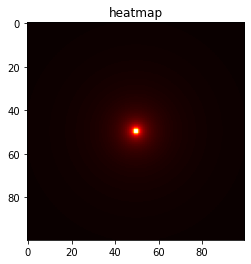

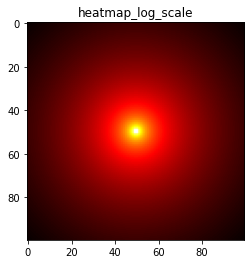

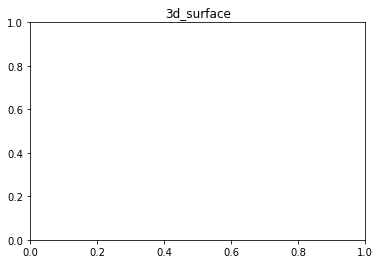

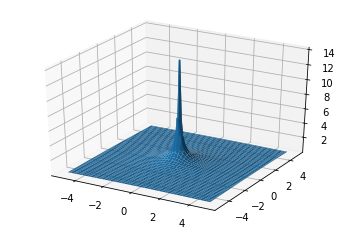

In [4]:
plt.figure(0)
plt.title("heatmap")
plt.imshow(V_grid,cmap='hot')
plt.figure(1)
plt.title("heatmap_log_scale")
plt.imshow(V_grid_log,cmap='hot')
plt.figure(2)
plt.title("3d_surface")
#plt.plot_surface(xv,yv,V(xv,yv))
""""""
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
zs = np.array(V(np.ravel(xv), np.ravel(yv)))
Z = zs.reshape(xv.shape)

ax.plot_surface(xv, yv, Z)


### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

grad V = [Vx,Vy]
grad V = [V(x_i+1,y)-V(x,y)/(x_i+1-x)   ,   [V(x,y_i+1)-V(x,y)/(y_i+1 - y)]
også kan du bruke en mer sentrert differanse terme. Denne er mer nøyaktig ta taylorekspansjonen kansellerer et terme til.
grad V = [V(x_i+1,y)-V(x_i-1,y)/(x_i+1-x_i-1)   ,   [V(x,y_i+1)-V(x,y_i-1)/(y_i+1 - y_i-1)]

Taylor f(x+dx)= c1+c2(x+dx)+c3(x+dx)^2/2..
Taylor f(x-dx)= c1+c2(x-dx)+c3(x-dx)^2/2..
f(x+dx)-f(x-dx) = 0*c1+0*c2+c3P(x)/(x_i+1-x_i-1)/2, ser her c2 også blir kanseler siden +2xdx-2xdx er null.


------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [5]:
def find_grad(F):
    F_grid = np.zeros((N,N))
    grad_grid_Fx = np.zeros((N-2,N-2))
    grad_grid_Fy = np.zeros((N-2,N-2))
    x = np.linspace(-5,5,N)
    y = np.linspace(-5,5,N)
    
    for i in range(N):
        for j in range(N):
            if F(x[i],y[j]) > 10:
                F_grid[i][j] = 10
            F_grid[i][j] = F(x[i],y[j])
    for i in range(0,N-2):
        for j in range(0,N-2):
            grad_grid_Fx[i][j] = (F_grid[i+2][j]-F_grid[i][j])/(x[i+2]-x[i]) #Endringen i F(x) til F(x+dx) delt på differenasen dx
            grad_grid_Fy[i][j] = (F_grid[i][j+2]-F_grid[i][j])/(y[i+2]-y[i])
    return grad_grid_Fx, grad_grid_Fx

import autograd.numpy as np
from autograd import value_and_grad


$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

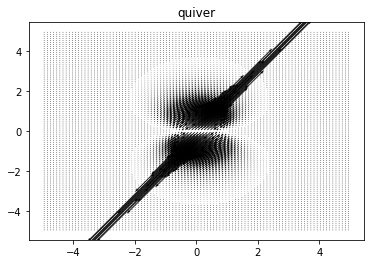

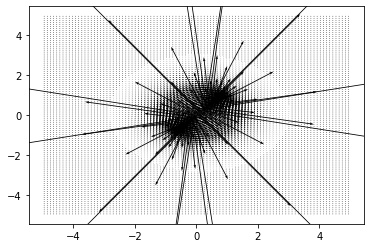

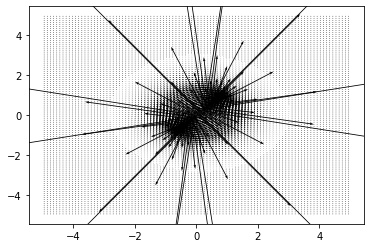

In [6]:
Ex0, Ey0 = find_grad(V)
Ex,Ey = -Ex0,-Ey0
x_line = np.linspace(-5+(5/N),5-(5/N),N-2)
y_line = np.linspace(-5+(5/N),5-(5/N),N-2)
plt.figure(5)
plt.title("quiver")
plt.quiver(x_line,y_line,Ex,Ey)

DV = value_and_grad(V)
gradV = np.gradient(V_grid)
Enumx1 = Ex
Enumy1 = Ey
Enumx2 = Ex
Enumy2 = Ey
i,j = 0,0
for x in x_line:  
    for y in y_line:
        Enumx1[i][j] = -DV(x,y)[0]
        Enumy1[i][j] = -DV(x,y)[1]
        Enumx2[i][j] = -gradV[0][i][j]
        Enumy2[i][j] = -gradV[1][i][j]
        
        j+=1
    j=0
    i+=1
fig1, ax1 = plt.subplots()
#ax.title("quiver_med_numgrad")
ax1.quiver(x_line,y_line,Enumx1,Enumy1)
fig2, ax2 = plt.subplots()
#ax.title("quiver_med_numgrad")
ax2.quiver(x_line,y_line,Enumx2,Enumy2)
